In [19]:
import pandas as pd

In [20]:
water_parameters = pd.read_csv('C:\\Users\\guilh\\Ironhack\\Final Proj Iron Hack\\Water potability\water_potability.csv')

In [21]:
water_parameters.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# 1.Data treatment

In [22]:
#check for the types of each column
water_parameters.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [23]:
#checking for null values
water_parameters.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [24]:
#shows how manny rows and column the dataframe have
water_parameters.shape

(3276, 10)

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Potability'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

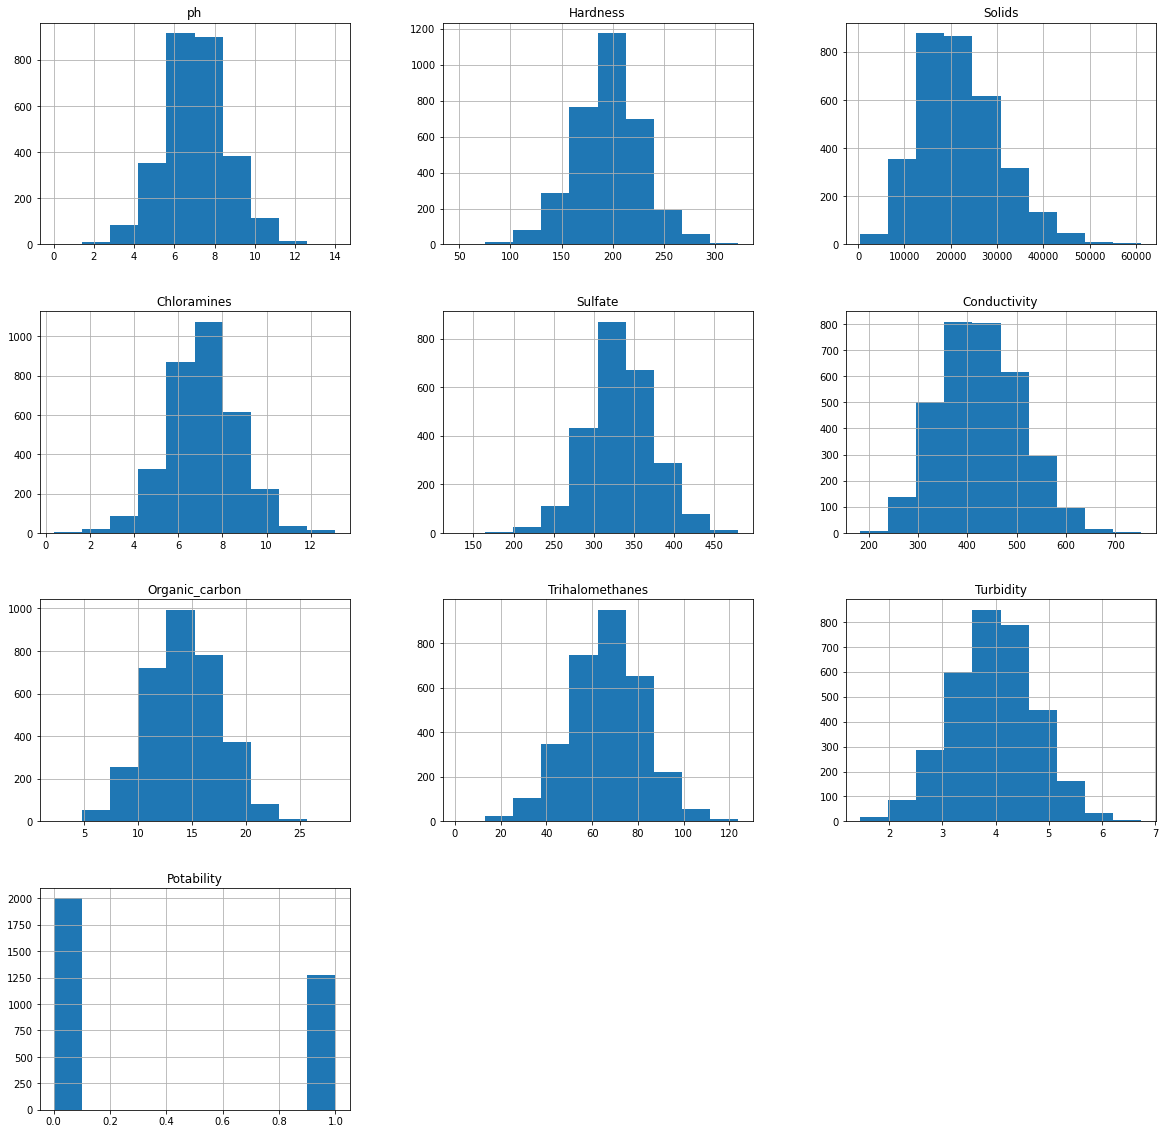

In [25]:
#plots the histogram for each feature in order to understand the distribution of the values
water_parameters.hist(figsize=(20,20))

In [26]:
#calculate the percentage of null values in the pH column compared to the total number of rows
ph_null = (water_parameters['ph'].isnull().sum()/len(water_parameters) ) *100

#calculate the percentage of null values in the Sulfate column compared to the total number of rows
sulfate_null = (water_parameters['Sulfate'].isnull().sum()/len(water_parameters) ) *100

#calculate the percentage of null values in the Trihalomethanes column compared to the total number of rows
trihalo_null = (water_parameters['Trihalomethanes'].isnull().sum()/len(water_parameters) ) *100

print('The percentage of null values in the column ph are',int(ph_null),'%\n')
print('The percentage of null values in the column Sulfate are',int(sulfate_null),'%\n')
print('The percentage of null values in the column Trihalomethanes are',int(trihalo_null),'%')

The percentage of null values in the column ph are 14 %

The percentage of null values in the column Sulfate are 23 %

The percentage of null values in the column Trihalomethanes are 4 %


# 2.Filling null values

The percentage of null values in the columns pH and Sulfate are significative, it will create problems for the model to substitute 
the values with zeros.

A way to solve it is going to be to separate all the rows that have the value zero and one for potability,
and then compute the mean or median for each column where the missing values are relevant.
For precaution i'm goin to do this for all the columns with missing values even if the column Trihalomethanes only have 4 % null values

In [27]:
#selects all the dataframe rows that have  the column potability equal to 1 (potable water)
select_potable = water_parameters.loc[water_parameters['Potability'] == 1]

#selects all the dataframe rows that have  the column potability equal to 0 (non potable water)
select_not_potable = water_parameters.loc[water_parameters['Potability'] == 0]


# 2.1 Filling null values for potable water

In [28]:
"columns to fill : ph ; Sulfate ; Trihalomethanes  "

'columns to fill : ph ; Sulfate ; Trihalomethanes  '

In [29]:
#based on the histograms above the distribuiton seems close to a normal, the mean to fill the missing values would be a good option
ph_mean= select_potable['ph'].mean() 
select_potable['ph'].fillna(value=ph_mean, inplace=True)

ph_mean= select_potable['Sulfate'].mean() 
select_potable['Sulfate'].fillna(value=ph_mean, inplace=True)

ph_mean= select_potable['Trihalomethanes'].mean() 
select_potable['Trihalomethanes'].fillna(value=ph_mean, inplace=True)

# 2.2 Filling null values for non potable water

In [30]:
"columns to fill : ph ; Sulfate ; Trihalomethanes  "

'columns to fill : ph ; Sulfate ; Trihalomethanes  '

In [31]:
# filling missing value using fillna()  
ph_mean= select_not_potable['ph'].mean() 
select_not_potable['ph'].fillna(value=ph_mean, inplace=True)

ph_mean= select_not_potable['Sulfate'].median() 
select_not_potable['Sulfate'].fillna(value=ph_mean, inplace=True)

ph_mean= select_not_potable['Trihalomethanes'].median() 
select_not_potable['Trihalomethanes'].fillna(value=ph_mean, inplace=True)

# 2.3 Concatenate the rows for potable water with the ones for non potable water

In [32]:
water_df_clean = pd.concat([select_potable, select_not_potable])

In [33]:
water_df_clean.shape

(3276, 10)

In [34]:
water_df_clean.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Check what model is better

In [35]:
#check which is the best model to apply for this database, using pycaret
from pycaret.classification import *

setup(data=water_df_clean,target='Potability')

#the atribute Error can be ignored because it doesn't happen in the google colab and the results are the same!!!!

,Description,Value
0,session_id,3504
1,Target,Potability
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(3276, 10)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [36]:
best= compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8002,0.8682,0.6468,0.8133,0.7192,0.5675,0.5775,0.0970
lightgbm,Light Gradient Boosting Machine,0.7920,0.8669,0.6634,0.7816,0.7163,0.5540,0.5597,0.1440
xgboost,Extreme Gradient Boosting,0.7881,0.8627,0.6766,0.7633,0.7163,0.5483,0.5517,0.1830
gbc,Gradient Boosting Classifier,0.7832,0.8722,0.6028,0.8022,0.6872,0.5267,0.5400,0.0890
ada,Ada Boost Classifier,0.7287,0.8150,0.5247,0.7196,0.6050,0.4062,0.4193,0.0360
dt,Decision Tree Classifier,0.7218,0.7118,0.6634,0.6462,0.6537,0.4214,0.4225,0.0090
et,Extra Trees Classifier,0.6760,0.7221,0.3564,0.6720,0.4641,0.2631,0.2906,0.0840
qda,Quadratic Discriminant Analysis,0.6651,0.6852,0.3465,0.6446,0.4501,0.2397,0.2638,0.0070
nb,Naive Bayes,0.6184,0.6047,0.2387,0.5443,0.3313,0.1178,0.1378,0.0080
lr,Logistic Regression,0.6023,0.5166,0.0000,0.0000,0.0000,-0.0026,-0.0129,0.0110


In [ ]:
#For my choice i'm going to prioritize recall ('Play safe') because it is better to say that the water is not potable and it is 
#then saying that the water is potable and then it will be a helth issue!!

#I can try the Random Forest Classifier and the Decision Tree Classifier

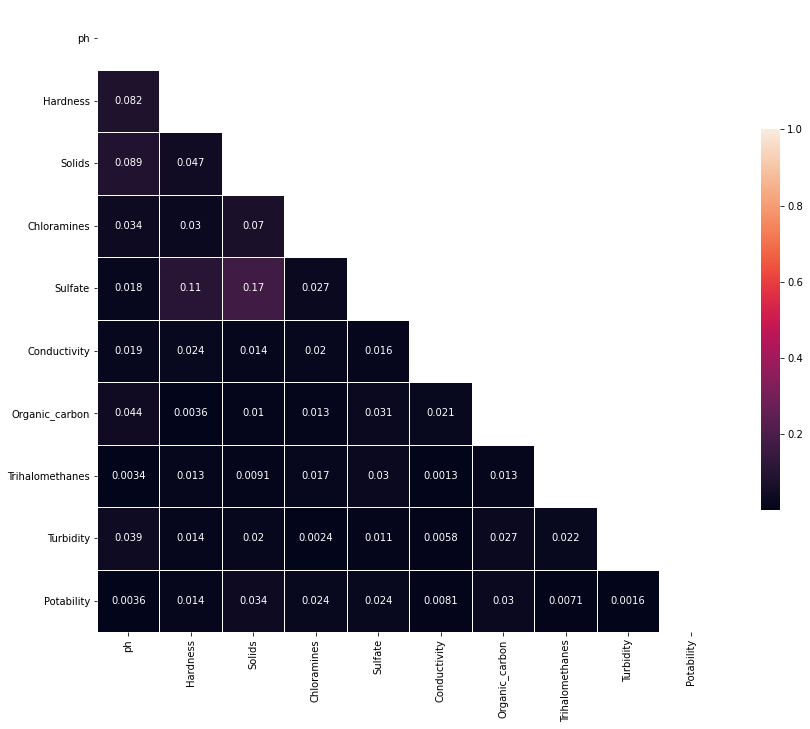

In [36]:
#Creates a correlation matrix. 
# This is shown below. 
# Only the lower triangular component of the matrix is shown due to the fact that 
# the upper and lower (triangular) parts of the matrix are equal
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

corr=np.abs(water_parameters.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

# Splitting the target and the features

In [211]:
y = water_df_clean['Potability']
X = water_df_clean.drop(['Potability'],axis=1)

In [179]:
# Creating the train and the test.
from sklearn.model_selection import train_test_split
#random state equal to 42 because is the Answer to the Ultimate Question of Life (he Hitchhiker's Guide to the Galaxy hehe)
#random stare equal to 42 or other number just defines that each time we run it will give the same output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None, random_state =42)

# 1.Prediction models

In [52]:
#I'm going with the Extreme Gradient Boosting because it gives me the best recall

## 1.1Extreme Gradient Boosting

In [180]:

import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from xgboost import XGBClassifier # for extreme gradient boosting model

In [181]:
def model_training(X, y, n_trees, mdepth, gamma, lam):

    ##### Step 1 - Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


    ##### Step 2 - Set model and its parameters
    model = XGBClassifier(use_label_encoder=False, 
                      booster='gbtree', # boosting algorithm to use, default gbtree, othera: gblinear, dart
                      n_estimators=n_trees, # number of trees, default = 100
                      eta=0.01, # this is learning rate, default = 0.3
                      max_depth=mdepth, # maximum depth of the tree, default = 6
                      gamma = gamma, # used for pruning, if gain < gamma the branch will be pruned, default = 0
                      reg_lambda = lam, # regularization parameter, defautl = 1
                      #min_child_weight=0 # this refers to Cover which is also responsible for pruning if not set to 0
                     )

    # Fit the model
    clf = model.fit(X_train, y_train)


    ##### Step 3
    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)


    ##### Step 4 - Model summary
    # Basic info about the model
    print('*************** Tree Summary ***************')
    print('No. of classes: ', clf.n_classes_)
    print('Classes: ', clf.classes_)
    print('No. of features: ', clf.n_features_in_)
    print('No. of Estimators: ', clf.n_estimators)
    print('--------------------------------------------------------')
    print("")

    print('*************** Evaluation on Test Data ***************')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("")

    print('*************** Evaluation on Training Data ***************')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    
    return clf, X_test, y_test


##### Step 5 - Select data for modelling and call the function to train the model

# Train the model
clf, X_test, y_test = model_training(X, y, n_trees=100, mdepth=3, gamma=1, lam=1)

[17:10:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
*************** Tree Summary ***************
No. of classes:  2
Classes:  [0 1]
No. of features:  9
No. of Estimators:  100
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.7469512195121951
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       385
           1       0.76      0.56      0.65       271

    accuracy                           0.75       656
   macro avg       0.75      0.72      0.73       656
weighted avg       0.75      0.75      0.74       656

--------------------------------------------------------

*************** Evaluation on T


## Check for overfitting of the Extreme Gradient Boosting

[0]	validation_0-error:0.27347	validation_0-logloss:0.68949	validation_1-error:0.27634	validation_1-logloss:0.68948
[1]	validation_0-error:0.25160	validation_0-logloss:0.68590	validation_1-error:0.25139	validation_1-logloss:0.68585
[2]	validation_0-error:0.25160	validation_0-logloss:0.68238	validation_1-error:0.25139	validation_1-logloss:0.68232
[3]	validation_0-error:0.25160	validation_0-logloss:0.67893	validation_1-error:0.25139	validation_1-logloss:0.67883
[4]	validation_0-error:0.25160	validation_0-logloss:0.67553	validation_1-error:0.25139	validation_1-logloss:0.67544
[5]	validation_0-error:0.25160	validation_0-logloss:0.67221	validation_1-error:0.25139	validation_1-logloss:0.67210
[6]	validation_0-error:0.25160	validation_0-logloss:0.66894	validation_1-error:0.25139	validation_1-logloss:0.66880
[7]	validation_0-error:0.25160	validation_0-logloss:0.66573	validation_1-error:0.25139	validation_1-logloss:0.66560
[8]	validation_0-error:0.25160	validation_0-logloss:0.66258	validation_1

[71]	validation_0-error:0.23336	validation_0-logloss:0.53797	validation_1-error:0.24769	validation_1-logloss:0.53996
[72]	validation_0-error:0.23336	validation_0-logloss:0.53676	validation_1-error:0.24584	validation_1-logloss:0.53890
[73]	validation_0-error:0.23336	validation_0-logloss:0.53558	validation_1-error:0.24584	validation_1-logloss:0.53779
[74]	validation_0-error:0.23336	validation_0-logloss:0.53437	validation_1-error:0.24584	validation_1-logloss:0.53661
[75]	validation_0-error:0.23336	validation_0-logloss:0.53320	validation_1-error:0.24584	validation_1-logloss:0.53558
[76]	validation_0-error:0.23336	validation_0-logloss:0.53202	validation_1-error:0.24584	validation_1-logloss:0.53440
[77]	validation_0-error:0.23336	validation_0-logloss:0.53088	validation_1-error:0.24584	validation_1-logloss:0.53341
[78]	validation_0-error:0.22926	validation_0-logloss:0.52976	validation_1-error:0.23475	validation_1-logloss:0.53241
[79]	validation_0-error:0.22926	validation_0-logloss:0.52861	val

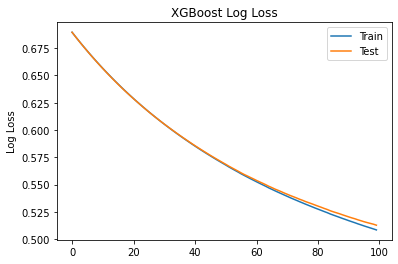

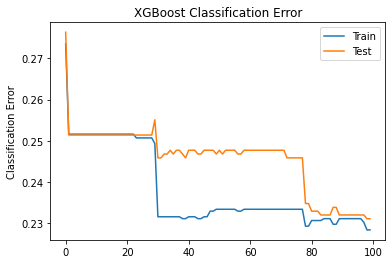

In [182]:
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load data
dataset = water_df_clean
# split data into X and y
#X = dataset[:,0:8]
#Y = dataset[:,8]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)
# fit model no training data
model = XGBClassifier(use_label_encoder=False, 
                      booster='gbtree', # boosting algorithm to use, default gbtree, othera: gblinear, dart
                      n_estimators=100, # number of trees, default = 100
                      eta=0.01, # this is learning rate, default = 0.3
                      max_depth=4, # maximum depth of the tree, default = 6
                      gamma = 1, # used for pruning, if gain < gamma the branch will be pruned, default = 0
                      reg_lambda = 1, # regularization parameter, defautl = 1
                      #min_child_weight=0 # this refers to Cover which is also responsible for pruning if not set to 0
                     )
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [204]:
# early stopping
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data into X and y
#X = dataset[:,0:8]
#Y = dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=9, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.59396
[1]	validation_0-logloss:0.53618
[2]	validation_0-logloss:0.49283
[3]	validation_0-logloss:0.46783
[4]	validation_0-logloss:0.45445
[5]	validation_0-logloss:0.44142
[6]	validation_0-logloss:0.43224
[7]	validation_0-logloss:0.42646
[8]	validation_0-logloss:0.42551
[9]	validation_0-logloss:0.42423
[10]	validation_0-logloss:0.41704
[11]	validation_0-logloss:0.41450
[12]	validation_0-logloss:0.41395
[13]	validation_0-logloss:0.41215
[14]	validation_0-logloss:0.41499
[15]	validation_0-logloss:0.41467
[16]	validation_0-logloss:0.41420
[17]	validation_0-logloss:0.41281
[18]	validation_0-logloss:0.41244
[19]	validation_0-logloss:0.41224
[20]	validation_0-logloss:0.41269
[21]	validation_0-logloss:0.41199
[22]	validation_0-logloss:0.41312
[23]	validation_0-logloss:0.41567
[24]	validation_0-logloss:0.41571
[25]	validation_0-logloss:0.41599
[26]	validation_0-logloss:0.41617
[27]	validation_0-logloss:0.41749
[28]	validation_0-logloss:0.41814
[29]	validation_0-loglos

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [201]:
model.score(X_test,y_test)

0.7855822550831792

In [202]:
print("test data accuracy was ",model.score(X_test,y_test))
# 100% on training data
print("train data accuracy was ",model.score(X_train,y_train))

test data accuracy was  0.7855822550831792
train data accuracy was  0.935278030993619


## Recall score

In [206]:
from sklearn.metrics import recall_score
y_true = water_df_clean['Potability']
y_pred = pd.Series(XGBClassifier.predict(X_test),name='Potability')

TypeError: predict() missing 1 required positional argument: 'X'

In [186]:
len(y_pred)

1082

In [171]:
recall_score(y_true, y_pred, average='micro')

ValueError: Found input variables with inconsistent numbers of samples: [3276, 1082]

# 1.2Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
model = DecisionTreeClassifier(max_depth = 7) # i choose 3 insted of 20, because gives the best result without overfiting, the number was choosen based on the plot in the cell down!!
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [93]:
#Trees are, unfortunately, overfitty
# relatively low performance on test
print("test data accuracy was ",model.score(X_test,y_test))
# 100% on training data
print("train data accuracy was ",model.score(X_train,y_train))

test data accuracy was  0.8109756097560976
train data accuracy was  0.814000814000814


# 1.1.1Decision Tree Classifier visual Hyperparameters Tuning

In [58]:
# why dont I repeat the process but choose the max_depth of the tree
max_depth = range(1,30)
test = []
train = []

for depth in max_depth:
  model = DecisionTreeClassifier(max_depth= depth)
  model.fit(X_train, y_train)
  test.append(model.score(X_test,y_test))
  train.append(model.score(X_train,y_train))

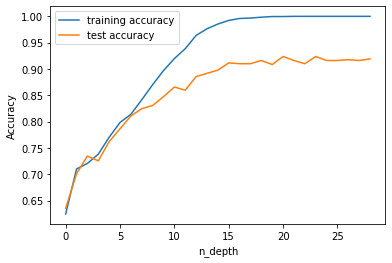

In [59]:
# we quickly see overfitting properties
import matplotlib.pyplot as plt
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth")
plt.legend()

# 1.3 Random Forest Classifier

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1) #not defining any hyperparameters
forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [119]:
forest_model.score(X_test,y_test)

0.9359756097560976

# 1.2.1 Random Forest Classifier Hyperparameters Tuning

# 1.2.1.1 Grid Search

In [97]:
# Grid Search goes through all combinations of hyperparameters
from sklearn.model_selection import GridSearchCV

# we need to define what we consider the "full list" of hyperparameters

# Number of trees in random forest
n_estimators = [10,100,500,1000]
# Mximum number of total leaves to consider
max_leaf_nodes = [15, 30, 40]
# Maximum number of levels in each tree
max_depth = [5,10]

In [98]:
# Create the  grid 
# this is a dictionary from hyperparameters to potential values
# the keys in this dictionary have to match the names of the hyperparameters in the documentation of the model
grid = {'n_estimators': n_estimators,
        'max_leaf_nodes': max_leaf_nodes,
        'max_depth': max_depth}

In [99]:
# Instantiate the grid search model object

# estimator -> model to optimize 
forest = RandomForestClassifier()
# param_grid -> state the dictionary of parameters to optimize
# cv = 5 -> number of cross validation folds <------ CV is REALLY important in grid search. Why?
#Cross validation is a technique used to identify how well our model performed and there is always a need to test the accuracy of our model to verify that,
#our model is well trained with data without any overfitting and underfitting
grid_search = GridSearchCV(estimator = forest, param_grid = grid, cv = 5)

In [100]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10], 'max_leaf_nodes': [15, 30, 40],
                         'n_estimators': [10, 100, 500, 1000]})

In [101]:
# and the winner is...
grid_search.best_params_

{'max_depth': 10, 'max_leaf_nodes': 40, 'n_estimators': 1000}

In [102]:
# in grid search you are more likely to get really good results in your training set, even with CV
grid_search.best_score_

0.7944662460881229

In [103]:
grid_search.score(X_test, y_test)

0.8399390243902439

In [104]:
Drawback : GridSearchCV will go through all the intermediate combinations of hyperparameters which makes grid search computationally very expensive.
 
RandomizedSearchCV
RandomizedSearchCV solves the drawbacks of GridSearchCV, as it goes through only a fixed number of hyperparameter settings.

SyntaxError: invalid syntax (<ipython-input-104-a98fbe958439>, line 1)

# 1.2.1.2Random Search

In [207]:
# let us consider a large space of parameters
# go find parameters to optimize https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split <- a non-numeric parameter, no problem. Could also have been used in gridsearch
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None) #<- plus no cap
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [208]:
# it would be a bit insane to go over all of these combinations
# random search to the rescue
from sklearn.model_selection import RandomizedSearchCV

# in random search you have to say how many iterations you want to get:
# n_ iter -> how many random combinations he will try

# n_jobs -> if you want sklearn to parallelize the process. Can also be used in grid search

random_search = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 20, cv = 5, n_jobs = 10)

In [107]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=10,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [108]:
random_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [212]:
forest = RandomForestClassifier(bootstrap= True, max_depth= 50, max_features= 'sqrt', min_samples_leaf= 4,min_samples_split= 5,n_estimators= 1000)
forest.fit(X_train,y_train)
forest.score(X_test,y_test)

0.7985212569316081

In [110]:
random_search.best_score_

0.8005737419899657

In [111]:
random_search.score(X_test, y_test)

0.9039634146341463

In [213]:
water_prediction = pd.Series(forest.predict(X),name='Potability')

In [214]:
#water_prediction
recall_score(y, water_prediction, average='micro')

0.9151404151404151

In [ ]:
#dataset with all the columns including the sales that where predicted with the model
results_Forest = pd.concat([water_parameters.drop(['Potability'],axis=1), water_prediction],axis=1)

#displays the dataframe
results_Forest.head()

In [ ]:
results_Forest.to_excel('Predicted_Water_potability.xlsx',index = False)

# vou escolher a random Forest!!